In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_participants = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\data\TDF_full_ranking_2014_2024.csv', sep=',')

In [11]:
# Convert column names to lowercase
df_participants.columns = df_participants.columns.str.lower()

In [13]:
# Rename 'year' column to 'year_edition'
df_participants.rename(columns={'year': 'year_edition'}, inplace=True)

In [14]:
# Rename 'rider' column to 'rider_name'
df_participants.rename(columns={'rider': 'rider_name'}, inplace=True)   

In [20]:
df_participants.head()

,year_edition,rank,rider_name
0,2024,1,Tadej Pogačar
1,2024,2,Jonas Vingegaard
2,2024,3,Remco Evenepoel
3,2024,4,João Almeida
4,2024,5,Mikel Landa


In [9]:
df_aggregated = pd.read_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\notebooks\tour_de_france_riders_2014_to_2025_final.csv', sep=',')

In [15]:
# Rename 'name' column to 'rider_name'
df_aggregated.rename(columns={'name': 'rider_name'}, inplace=True)

In [21]:
df_aggregated.head()

,year_edition,rider_name,team,bib_number,nationality,birthdate,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,age,bmi
0,2014,FROOME Chris,Team Sky (WT),1,GB,1985-5-20,1.86,68.0,385,8296,4389,188,6508,2328,29,19.655451
1,2014,EISEL Bernhard,Team Sky (WT),2,AT,1981-2-17,1.83,74.0,2277,1126,268,684,102,541,33,22.096808
2,2014,KIRYIENKA Vasil,Team Sky (WT),3,BY,1981-6-28,1.82,69.0,506,1537,4521,29,1288,608,33,20.830818
3,2014,LÓPEZ David,Team Sky (WT),4,ES,1981-5-13,1.79,68.0,659,2028,264,1,939,476,33,21.222808
4,2014,NIEVE Mikel,Team Sky (WT),5,ES,1984-5-26,1.73,62.0,811,3608,31,0,4074,486,30,20.715694


In [22]:
# Normalize riders' names in both DataFrames
import unicodedata

def remove_accents(text):
    return ''.join(c for c in unicodedata.normalize('NFKD', text) if not unicodedata.combining(c))

# Clean rider names in df_participants
df_participants['name_clean'] = (
    df_participants['rider_name']
    .str.lower()
    .apply(remove_accents)
    .str.strip()
)

# Clean rider names in df_aggregated (e.g. "FROOME Chris" → "chris froome")
df_aggregated['name_clean'] = (
    df_aggregated['rider_name']
    .str.lower()
    .apply(remove_accents)
    .str.strip()
    .apply(lambda x: ' '.join(x.split()[1:] + [x.split()[0]]) if len(x.split()) >= 2 else x)
)

In [25]:
df_aggregated = df_aggregated.merge(
    df_participants[['year_edition', 'name_clean', 'rank']],
    on=['year_edition', 'name_clean'],
    how='left'
)


In [28]:
# Display all rows and columns
pd.set_option('display.max_rows', None)

In [33]:
df_aggregated.head()

,year_edition,rider_name,team,bib_number,nationality,birthdate,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,age,bmi,name_clean,rank
0,2014,FROOME Chris,Team Sky (WT),1,GB,1985-5-20,1.86,68.0,385,8296,4389,188,6508,2328,29,19.655451,chris froome,NaN
1,2014,EISEL Bernhard,Team Sky (WT),2,AT,1981-2-17,1.83,74.0,2277,1126,268,684,102,541,33,22.096808,bernhard eisel,114.0
2,2014,KIRYIENKA Vasil,Team Sky (WT),3,BY,1981-6-28,1.82,69.0,506,1537,4521,29,1288,608,33,20.830818,vasil kiryienka,112.0
3,2014,LÓPEZ David,Team Sky (WT),4,ES,1981-5-13,1.79,68.0,659,2028,264,1,939,476,33,21.222808,david lopez,111.0
4,2014,NIEVE Mikel,Team Sky (WT),5,ES,1984-5-26,1.73,62.0,811,3608,31,0,4074,486,30,20.715694,mikel nieve,18.0


In [32]:
# Print all results for the rider "pogacar"
df_pogacar = df_aggregated[df_aggregated['name_clean'].str.contains('pogacar', case=False)]
df_pogacar

,year_edition,rider_name,team,bib_number,nationality,birthdate,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,speciality_sprint,speciality_climber,speciality_hills,age,bmi,name_clean,rank
1259,2020,POGAČAR Tadej,UAE Team Emirates (WT),131,SI,1998-9-21,1.76,66.0,7677,6844,2703,194,8498,3706,21,21.306818,tadej pogacar,1.0
1331,2021,POGAČAR Tadej,UAE Team Emirates (WT),1,SI,1998-9-21,1.76,66.0,7677,6844,2703,194,8498,3706,22,21.306818,tadej pogacar,1.0
1515,2022,POGAČAR Tadej,UAE Team Emirates (WT),1,SI,1998-9-21,1.76,66.0,7677,6844,2703,194,8498,3706,23,21.306818,tadej pogacar,2.0
1703,2023,POGAČAR Tadej,UAE Team Emirates (WT),11,SI,1998-9-21,1.76,66.0,7677,6844,2703,194,8498,3706,24,21.306818,tadej pogacar,2.0
1879,2024,POGAČAR Tadej,UAE Team Emirates (WT),11,SI,1998-9-21,1.76,66.0,7677,6844,2703,194,8498,3706,25,21.306818,tadej pogacar,1.0


In [34]:
# Filter out rows where 'rank' is NaN
df_corr = df_aggregated[df_aggregated['rank'].notna()].copy()


In [35]:
# Convert 'rank' to numeric typ
df_corr['rank'] = df_corr['rank'].astype(float)


In [36]:
# One-hot encode nationality
df_encoded = pd.get_dummies(df_corr, columns=['nationality'], prefix='nat')



In [38]:
df_encoded.head()

,year_edition,rider_name,team,bib_number,birthdate,height,weight,speciality_one_day_races,speciality_gc,speciality_time_trial,...,nat_NO,nat_NZ,nat_PL,nat_PT,nat_RU,nat_SE,nat_SI,nat_SK,nat_US,nat_ZA
1,2014,EISEL Bernhard,Team Sky (WT),2,1981-2-17,1.83,74.0,2277,1126,268,...,False,False,False,False,False,False,False,False,False,False
2,2014,KIRYIENKA Vasil,Team Sky (WT),3,1981-6-28,1.82,69.0,506,1537,4521,...,False,False,False,False,False,False,False,False,False,False
3,2014,LÓPEZ David,Team Sky (WT),4,1981-5-13,1.79,68.0,659,2028,264,...,False,False,False,False,False,False,False,False,False,False
4,2014,NIEVE Mikel,Team Sky (WT),5,1984-5-26,1.73,62.0,811,3608,31,...,False,False,False,False,False,False,False,False,False,False
5,2014,PATE Danny,Team Sky (WT),6,1979-3-24,1.85,73.0,392,602,926,...,False,False,False,False,False,False,False,False,True,False


In [41]:
nat_counts = df_corr['nationality'].value_counts()
nat_counts


nationality
FR    293
ES    120
BE    116
IT     99
DE     92
NL     90
AU     67
GB     57
DK     49
CH     49
CO     41
AT     35
NO     35
US     34
SI     24
PL     23
PT     19
CA     18
NZ     15
CZ     14
KZ     13
ZA     12
IE     11
LU     11
SK      8
ER      7
LV      7
RU      6
EE      6
HR      5
LT      5
AR      5
CR      4
EC      3
JP      3
ET      3
BY      3
IL      3
SE      1
CN      1
Name: count, dtype: int64

In [42]:
threshold = 5
common_nationalities = nat_counts[nat_counts >= threshold].index


In [43]:
df_corr['nationality_grouped'] = df_corr['nationality'].apply(
    lambda x: x if x in common_nationalities else 'Other'
)


In [44]:
df_encoded = pd.get_dummies(df_corr, columns=['nationality_grouped'], prefix='nat')


In [55]:
df_encoded.head()

,year_edition,rider_name,team,bib_number,nationality,birthdate,height,weight,speciality_one_day_races,speciality_gc,...,nat_NO,nat_NZ,nat_Other,nat_PL,nat_PT,nat_RU,nat_SI,nat_SK,nat_US,nat_ZA
1,2014,EISEL Bernhard,Team Sky (WT),2,AT,1981-2-17,1.83,74.0,2277,1126,...,False,False,False,False,False,False,False,False,False,False
2,2014,KIRYIENKA Vasil,Team Sky (WT),3,BY,1981-6-28,1.82,69.0,506,1537,...,False,False,True,False,False,False,False,False,False,False
3,2014,LÓPEZ David,Team Sky (WT),4,ES,1981-5-13,1.79,68.0,659,2028,...,False,False,False,False,False,False,False,False,False,False
4,2014,NIEVE Mikel,Team Sky (WT),5,ES,1984-5-26,1.73,62.0,811,3608,...,False,False,False,False,False,False,False,False,False,False
5,2014,PATE Danny,Team Sky (WT),6,US,1979-3-24,1.85,73.0,392,602,...,False,False,False,False,False,False,False,False,True,False


In [47]:
# After one-hot encoding
df_encoded = pd.get_dummies(df_corr, columns=['nationality_grouped'], prefix='nat')

# Select only numeric columns for correlation
numeric_cols = df_encoded.select_dtypes(include='number').columns.tolist()

# Calculate correlation matrix only on numeric columns
correlation_matrix = df_encoded[numeric_cols].corr()


In [56]:
# Re-run one-hot encoding with dtype=int to ensure 0/1 instead of True/False
df_encoded = pd.get_dummies(df_corr, columns=['nationality_grouped'], prefix='nat', dtype=int)


In [58]:
# Re-select numeric columns
numeric_cols = df_encoded.select_dtypes(include='number').columns.tolist()

# Recompute correlation matrix
corr_matrix = df_encoded[numeric_cols].corr()

# Now this should work and return nationality columns:
print([col for col in corr_matrix.columns if col.startswith('nat_')])


['nat_AR', 'nat_AT', 'nat_AU', 'nat_BE', 'nat_CA', 'nat_CH', 'nat_CO', 'nat_CZ', 'nat_DE', 'nat_DK', 'nat_EE', 'nat_ER', 'nat_ES', 'nat_FR', 'nat_GB', 'nat_HR', 'nat_IE', 'nat_IT', 'nat_KZ', 'nat_LT', 'nat_LU', 'nat_LV', 'nat_NL', 'nat_NO', 'nat_NZ', 'nat_Other', 'nat_PL', 'nat_PT', 'nat_RU', 'nat_SI', 'nat_SK', 'nat_US', 'nat_ZA']


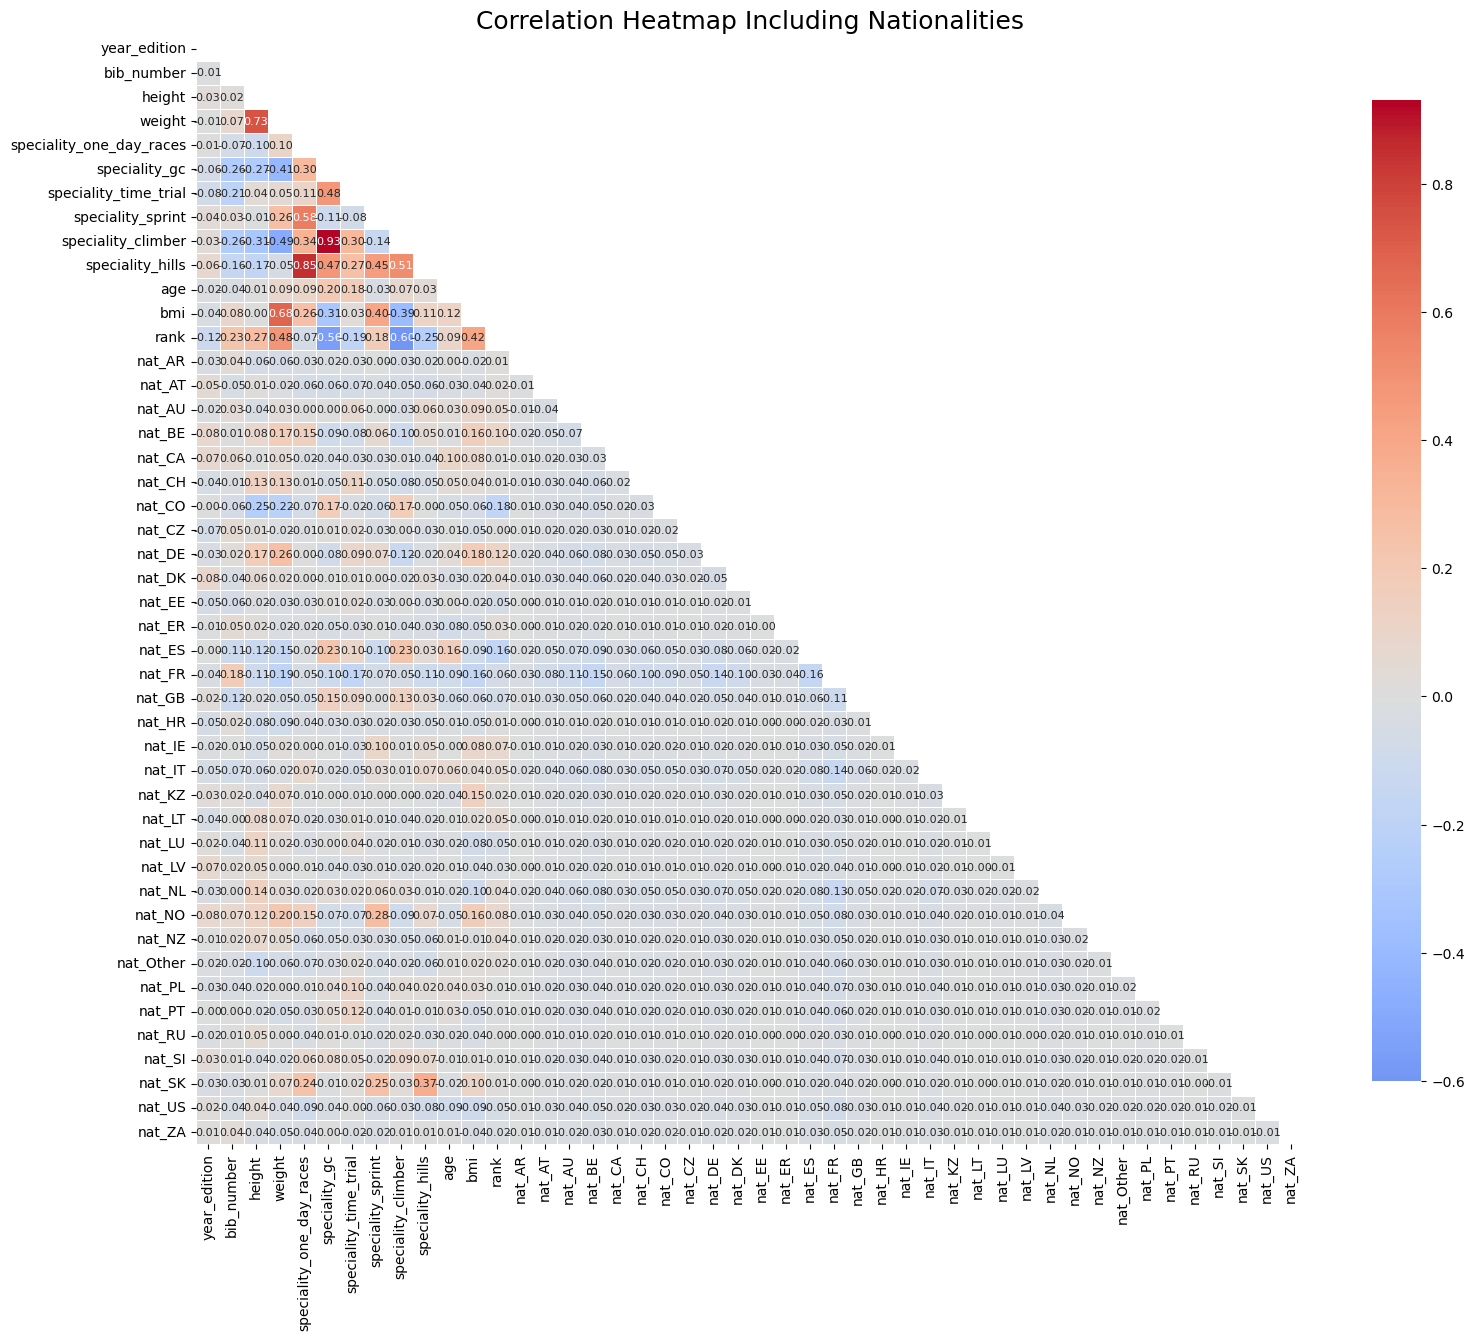

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select numeric columns (after one-hot encoding)
numeric_cols = df_encoded.select_dtypes(include='number').columns.tolist()

# 2. Compute correlation matrix
corr_matrix = df_encoded[numeric_cols].corr()

# 3. Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 4. Plot heatmap with coefficients and bigger size
plt.figure(figsize=(16, 14))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='coolwarm',
    center=0,
    annot=True,          # Show correlation coefficients
    fmt='.2f',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)

plt.title('Correlation Heatmap Including Nationalities', fontsize=18)
plt.tight_layout()
plt.show()


In [61]:
# Filter out nationalities from the correlation matrix
# Select only numeric columns
numeric_cols = df_encoded.select_dtypes(include='number').columns.tolist()

# Exclude nationality columns (those starting with 'nat_')
filtered_cols = [col for col in numeric_cols if not col.startswith('nat_')]

# Compute correlation matrix only on the filtered columns
corr_matrix = df_encoded[filtered_cols].corr()


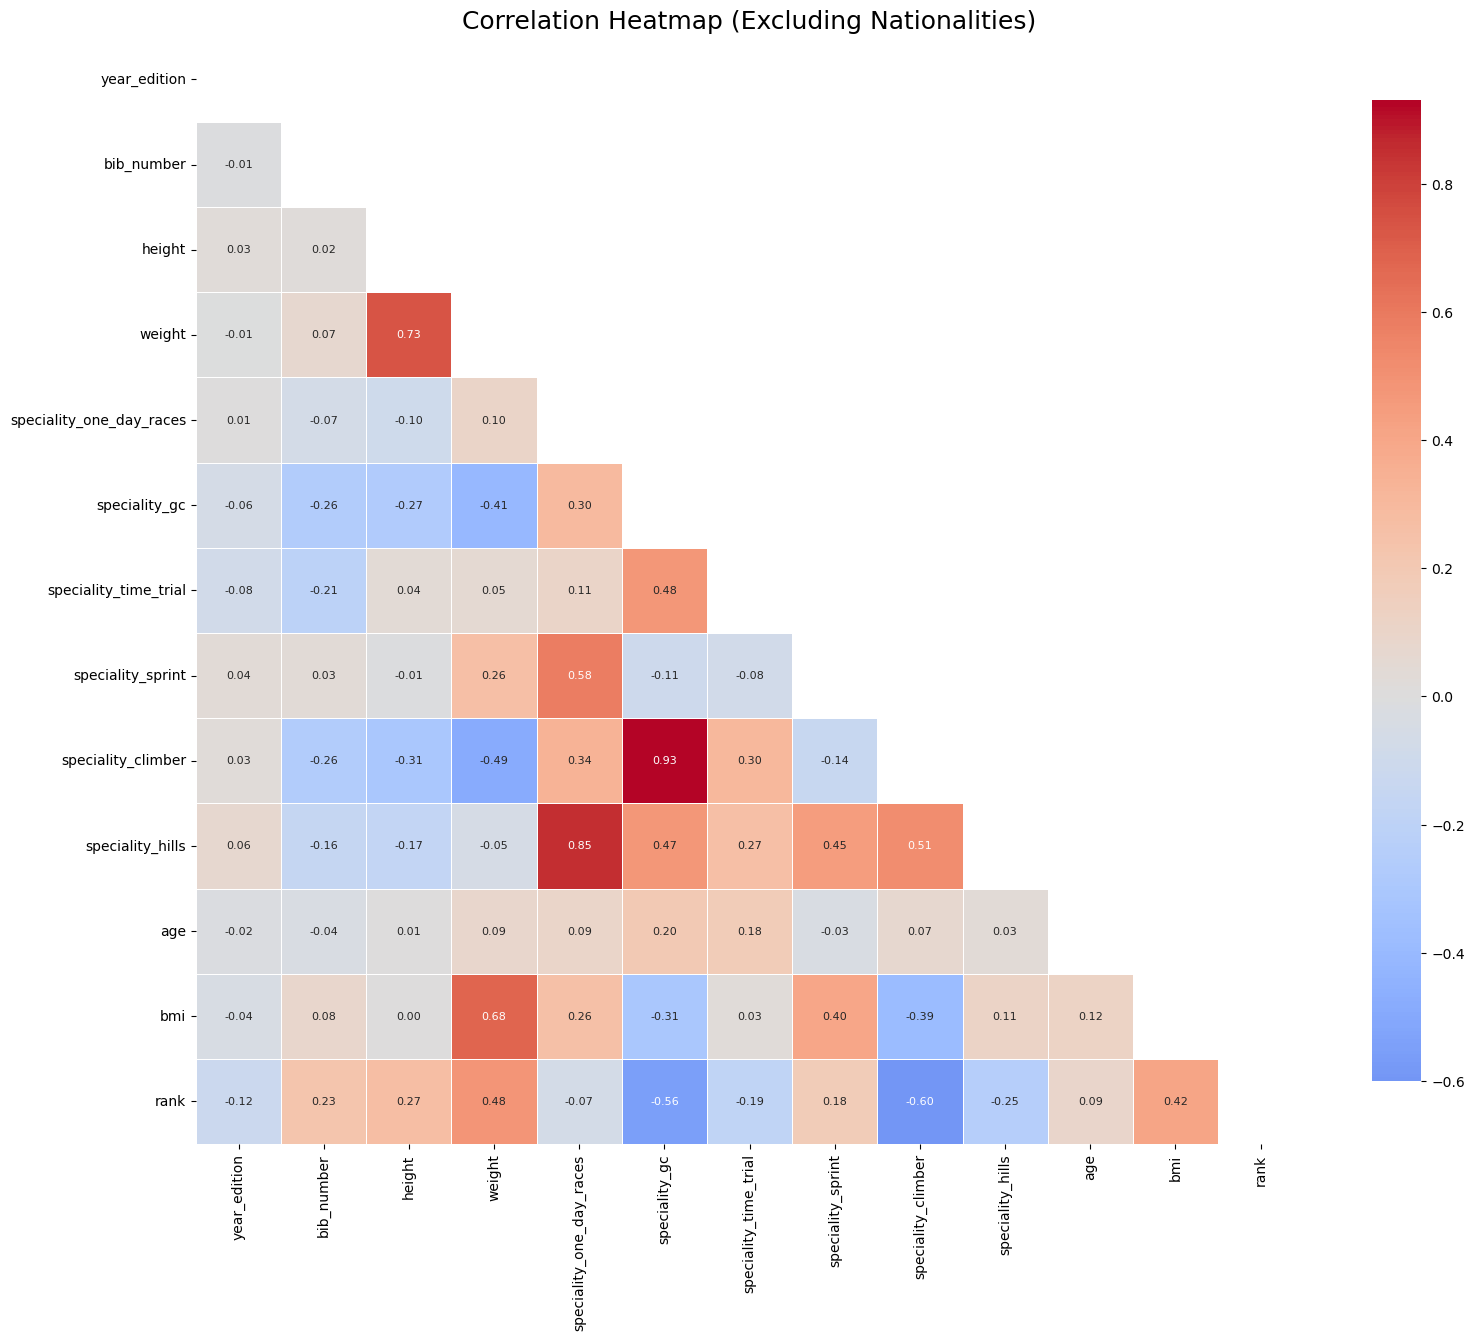

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot
plt.figure(figsize=(16, 14))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt='.2f',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 8}
)

plt.title('Correlation Heatmap (Excluding Nationalities)', fontsize=18)
plt.tight_layout()
plt.show()


In [65]:
# Get all numeric columns
numeric_cols = df_encoded.select_dtypes(include='number').columns.tolist()

# Optional: exclude nationality dummies
numeric_cols = [col for col in numeric_cols if not col.startswith('nat_')]


In [66]:
# Compute correlation with 'rank'
correlations = df_encoded[numeric_cols].corr()['rank'].drop('rank')



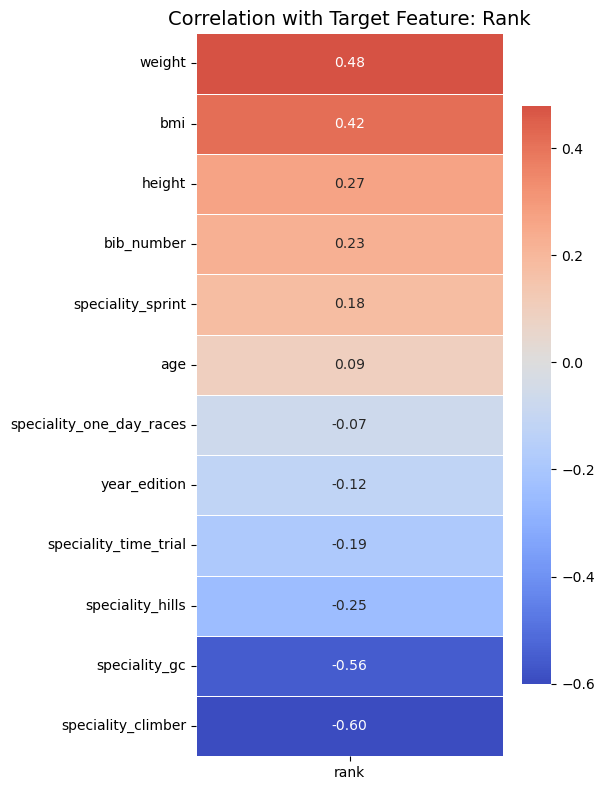

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to DataFrame for heatmap
corr_df = correlations.to_frame().sort_values('rank', ascending=False)

plt.figure(figsize=(6, len(corr_df) * 0.5 + 2))
sns.heatmap(
    corr_df,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title('Correlation with Target Feature: Rank', fontsize=14)
plt.tight_layout()
plt.show()




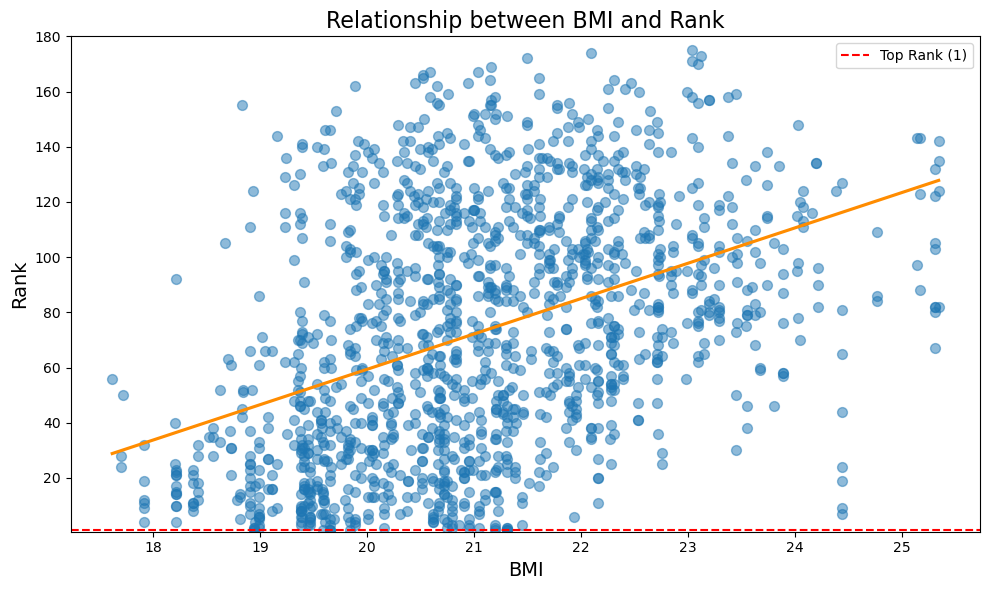

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot with trendline
sns.regplot(
    data=df_encoded,
    x='bmi',
    y='rank',
    scatter_kws={'alpha': 0.5, 's': 50},
    line_kws={'color': 'darkorange'},
    ci=None
)

# Highlight top rank with a dashed line
plt.axhline(y=1, color='red', linestyle='--', linewidth=1.5, label='Top Rank (1)')

# Labels and title
plt.title('Relationship between BMI and Rank', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Rank', fontsize=14)

# Optional: set y-axis to rank range
plt.ylim(0.5, df_encoded['rank'].max() + 5)

# Add legend
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


C:\Users\raclo\AppData\Local\Temp\ipykernel_37300\2053659620.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


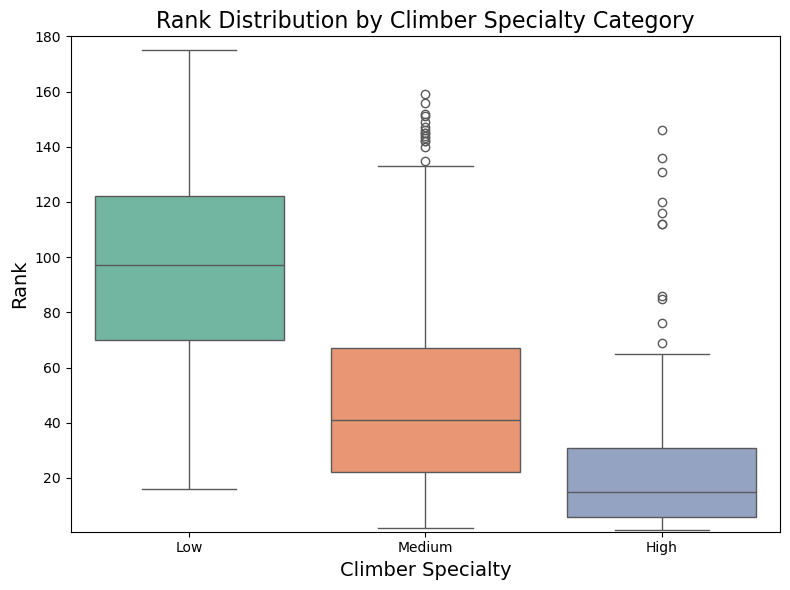

In [74]:
import pandas as pd

# Create bins
df_encoded['climber_cat'] = pd.cut(
    df_encoded['speciality_climber'],
    bins=[-1, 1000, 4000, df_encoded['speciality_climber'].max()],
    labels=['Low', 'Medium', 'High']
)

# Plot boxplot by these bins
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df_encoded,
    x='climber_cat',
    y='rank',
    palette='Set2'
)
plt.title('Rank Distribution by Climber Specialty Category', fontsize=16)
plt.xlabel('Climber Specialty', fontsize=14)
plt.ylabel('Rank', fontsize=14)
plt.ylim(0.5, df_encoded['rank'].max() + 5)
plt.tight_layout()
plt.show()


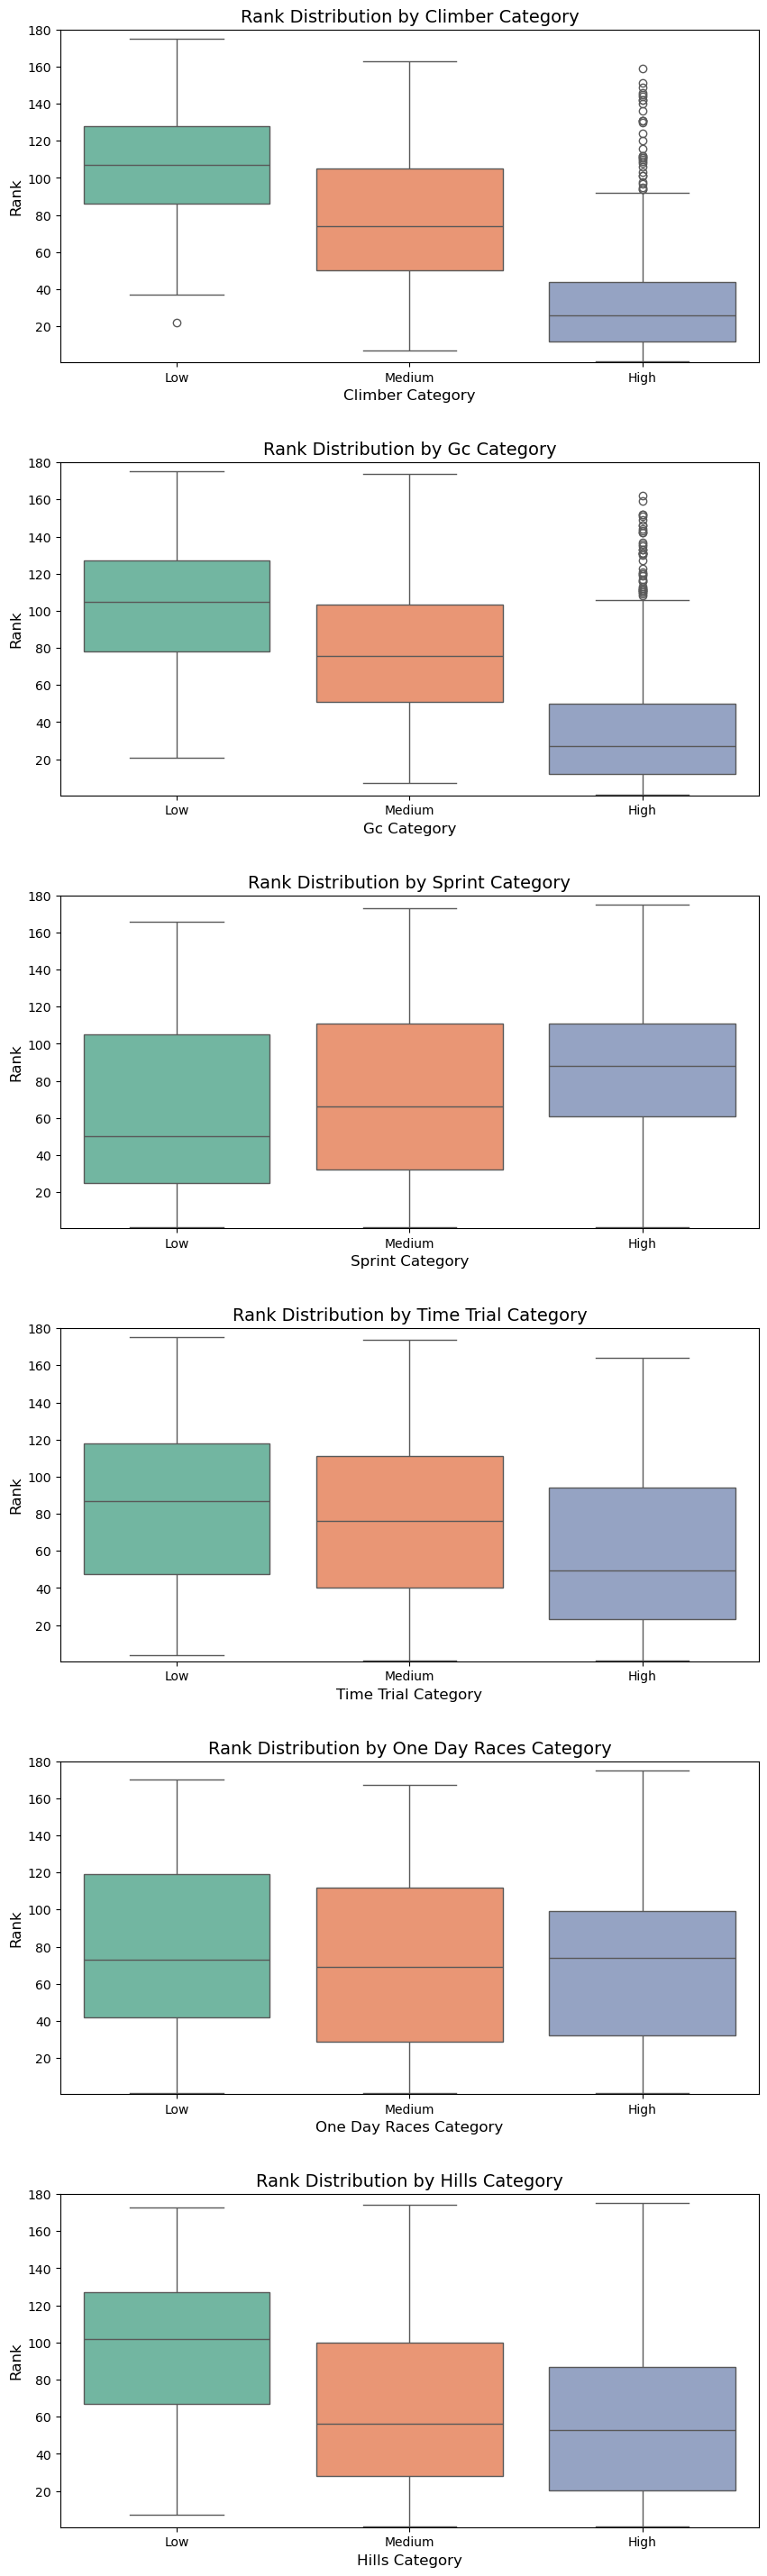

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

specialities = [
    'speciality_climber',
    'speciality_gc',
    'speciality_sprint',
    'speciality_time_trial',
    'speciality_one_day_races',
    'speciality_hills'
]

# Create binned categories if not done yet
for spec in specialities:
    bins = pd.qcut(df_encoded[spec], q=3, labels=['Low', 'Medium', 'High'])
    df_encoded[f'{spec}_cat'] = bins

n_specs = len(specialities)
fig, axes = plt.subplots(n_specs, 1, figsize=(10, 6 * n_specs))  # taller figure for more space

for i, spec in enumerate(specialities):
    sns.boxplot(
        data=df_encoded,
        x=f'{spec}_cat',
        y='rank',
        hue=f'{spec}_cat',
        palette='Set2',
        ax=axes[i],
        legend=False
    )
    axes[i].set_title(f'Rank Distribution by {spec.replace("speciality_", "").replace("_", " ").title()} Category', fontsize=14)
    axes[i].set_xlabel(f'{spec.replace("speciality_", "").replace("_", " ").title()} Category', fontsize=12)
    axes[i].set_ylabel('Rank', fontsize=12)
    axes[i].set_ylim(0.5, df_encoded['rank'].max() + 5)

plt.subplots_adjust(hspace=0.3)  # increase vertical space between plots
plt.show()


C:\Users\raclo\AppData\Local\Temp\ipykernel_37300\1757597676.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


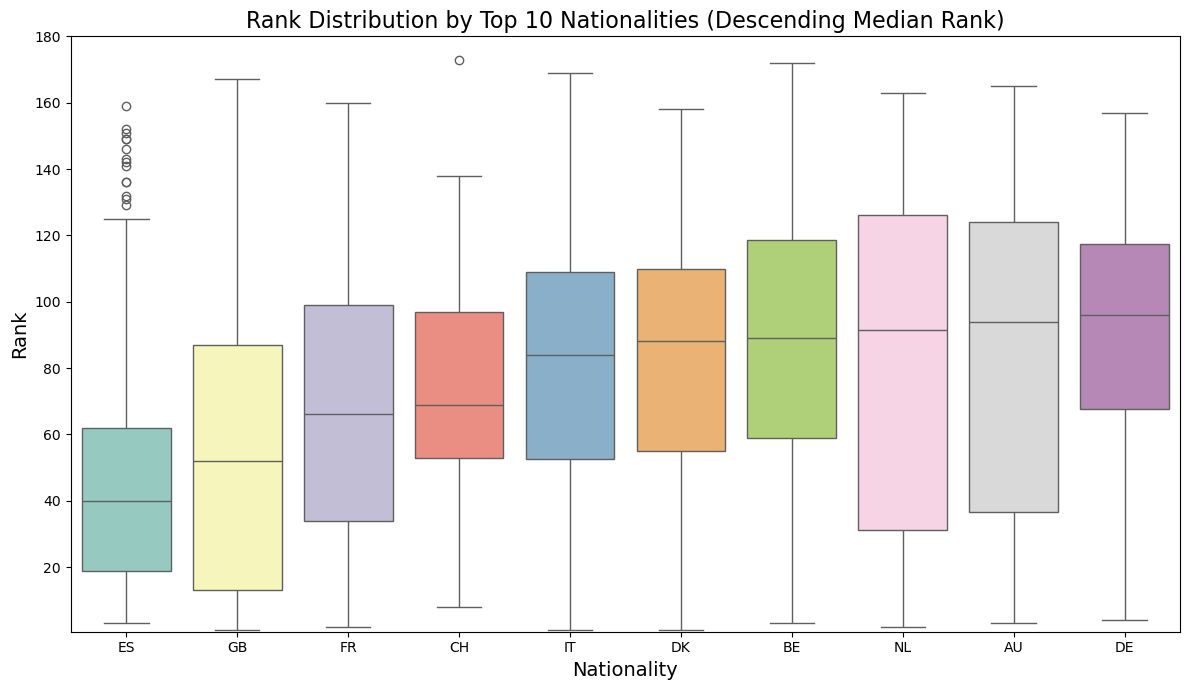

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top N nationalities
top_n = 10
top_nats = df_encoded['nationality'].value_counts().nlargest(top_n).index

# Filter dataframe
df_top_nats = df_encoded[df_encoded['nationality'].isin(top_nats)]

# Order nationalities by median rank descending (worst first)
order = df_top_nats.groupby('nationality')['rank'].median().sort_values(ascending=True).index

plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df_top_nats,
    x='nationality',
    y='rank',
    order=order,
    palette='Set3'
)

plt.title(f'Rank Distribution by Top {top_n} Nationalities (Descending Median Rank)', fontsize=16)
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Rank', fontsize=14)
plt.ylim(0.5, df_encoded['rank'].max() + 5)

# Rotate x-axis labels horizontally
plt.xticks(rotation=0)  # 0 degrees means horizontal

plt.tight_layout()
plt.show()


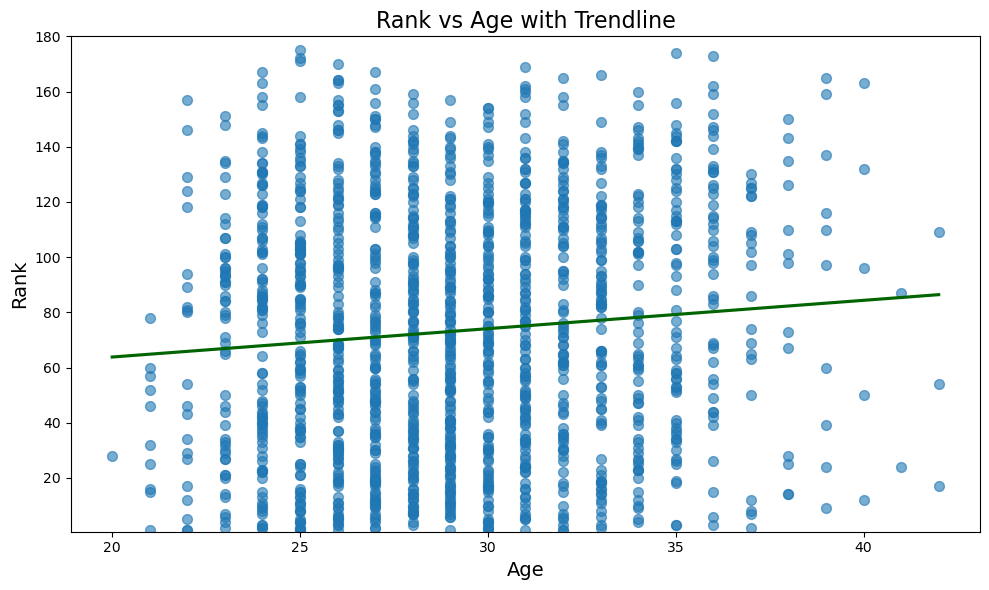

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.regplot(
    data=df_encoded,
    x='age',
    y='rank',
    scatter_kws={'alpha':0.6, 's':50},
    line_kws={'color':'darkgreen'},
    ci=None
)

plt.title('Rank vs Age with Trendline', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Rank', fontsize=14)
plt.ylim(0.5, df_encoded['rank'].max() + 5)

plt.tight_layout()
plt.show()


In [94]:
# Return number of riders per age group
age_counts = df_encoded['age_group'].value_counts().sort_index()
# Convert to DataFrame for better visualization
age_counts_df = age_counts.reset_index()
age_counts_df.columns = ['age_group', 'rider_count']

In [95]:
age_counts_df

,age_group,rider_count
0,"(20, 25]",285
1,"(25, 30]",619
2,"(30, 35]",404
3,"(35, 40]",93
4,"(40, 45]",5


age_group_adj
(25, 30]    619
(30, 35]    404
(20, 25]    285
(35, 45]     98
Name: count, dtype: int64


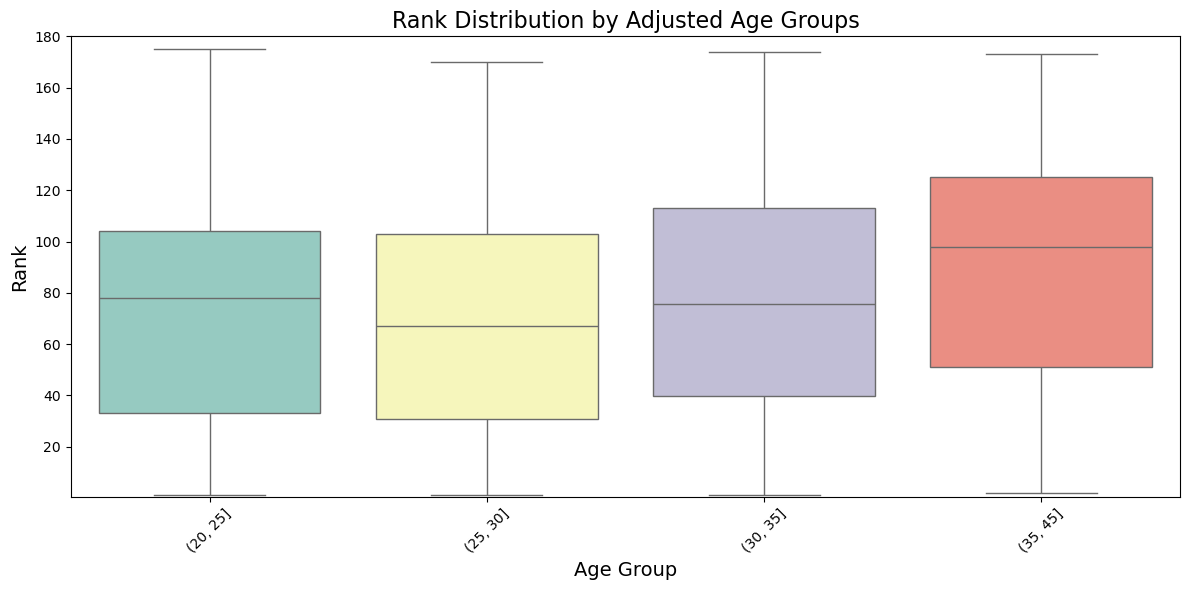

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define initial bins but merge small groups manually for your data
bins = [20, 25, 30, 35, 45]  # combine last two intervals (35,45]

# Create age groups with adjusted bins
df_encoded['age_group_adj'] = pd.cut(df_encoded['age'], bins=bins)

# Optional: Check counts to confirm
print(df_encoded['age_group_adj'].value_counts())

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_encoded, x='age_group_adj', y='rank', hue="age_group_adj", palette='Set3', legend=False)

plt.title('Rank Distribution by Adjusted Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Rank', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0.5, df_encoded['rank'].max() + 5)
plt.tight_layout()
plt.show()


In [110]:
# Categorize rank into groups
def rank_group(rank):
    if rank <= 3:
        return 'Top 3'
    elif 4 <= rank <= 10:
        return 'Top 10'
    else:
        return 'Below 10'
    
df_encoded['rank_group'] = df_encoded['rank'].apply(rank_group)


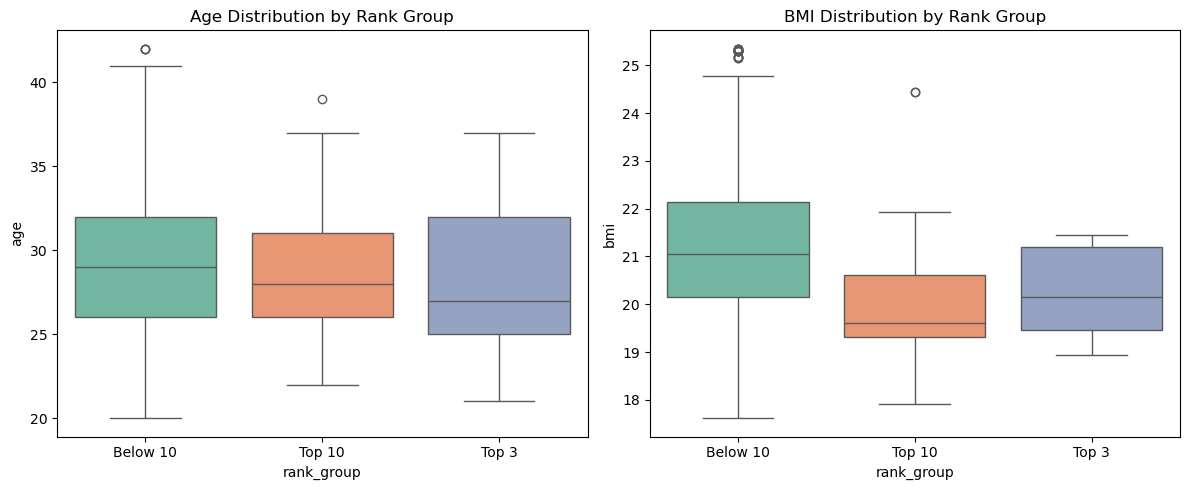

In [108]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df_encoded, x='rank_group', y='age', hue='rank_group', palette='Set2', legend=False)
plt.title('Age Distribution by Rank Group')

plt.subplot(1,2,2)
sns.boxplot(data=df_encoded, x='rank_group', y='bmi', hue='rank_group', palette='Set2', legend=False)
plt.title('BMI Distribution by Rank Group')

plt.tight_layout()
plt.show()


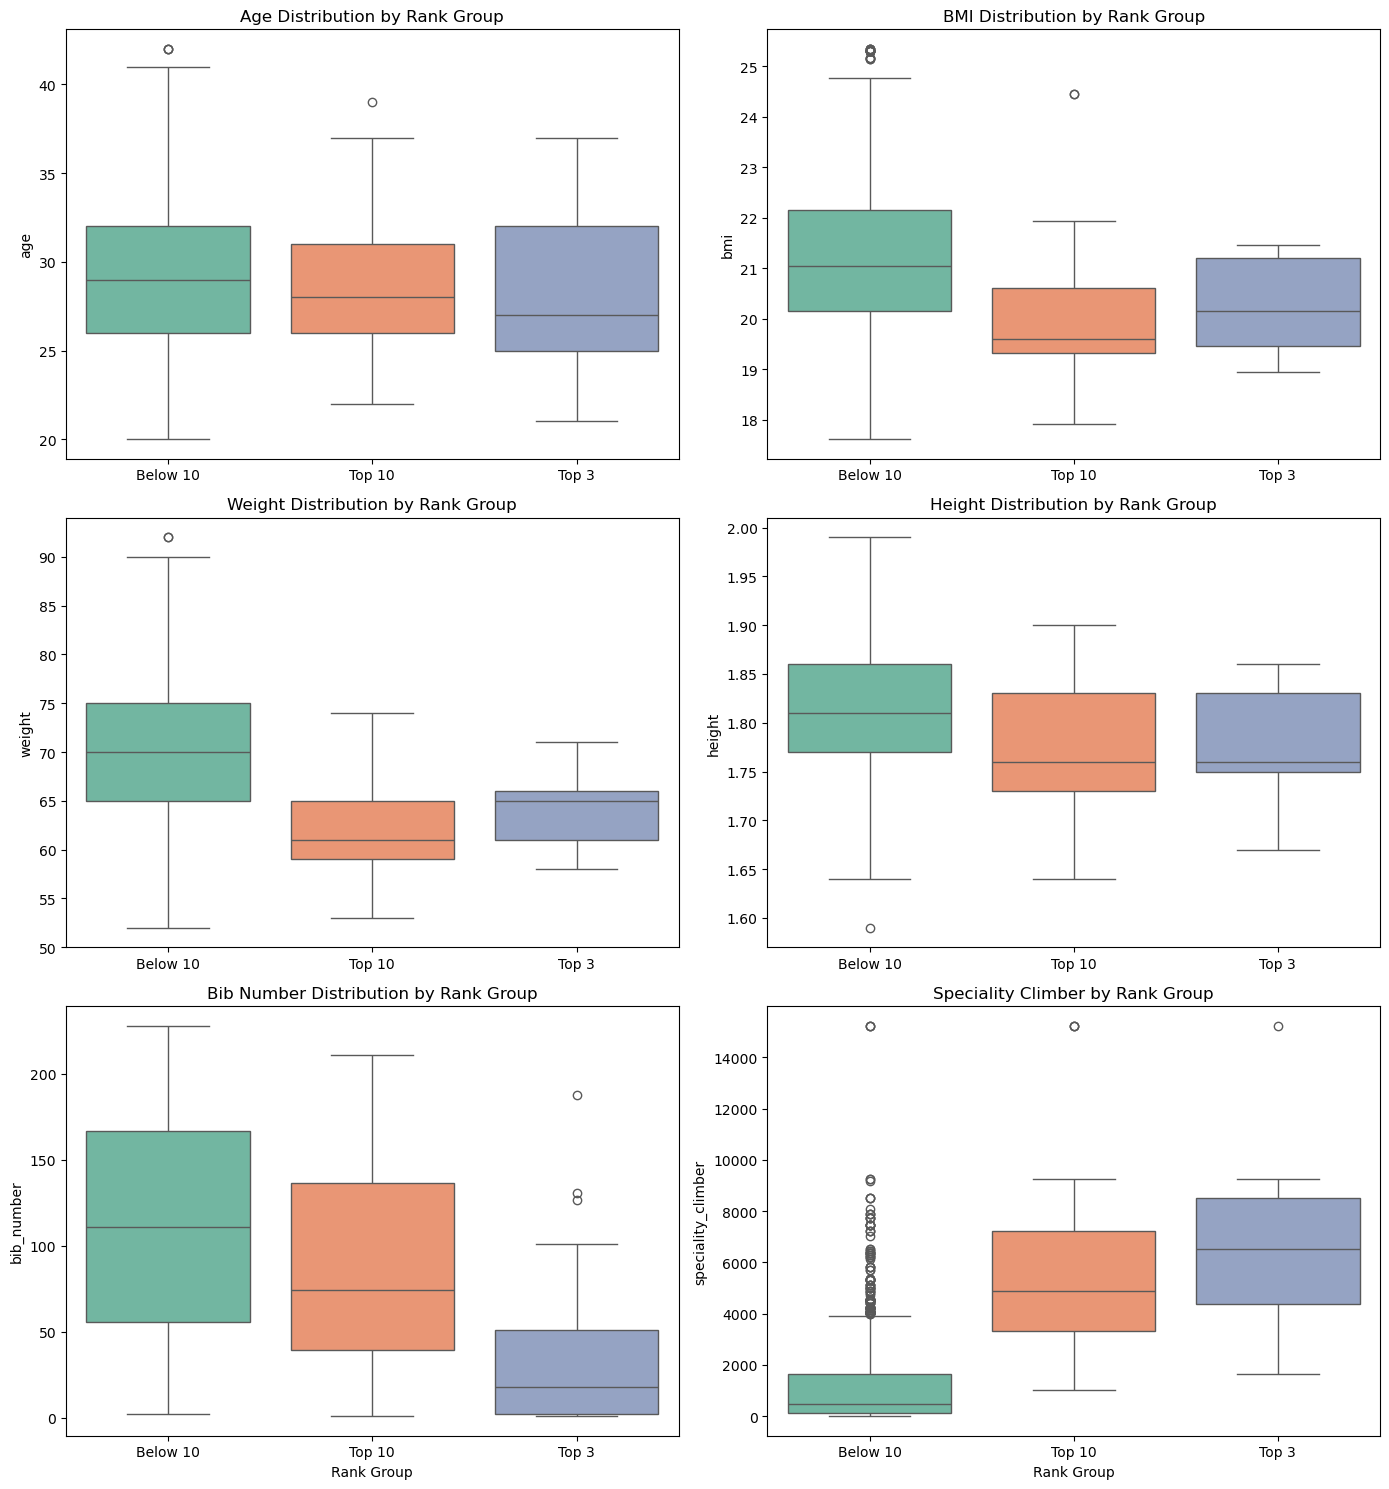

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 3x2 grid of subplots
plt.figure(figsize=(14, 15))

# Age
plt.subplot(3, 2, 1)
sns.boxplot(data=df_encoded, x='rank_group', y='age', hue='rank_group', palette='Set2', dodge=False)
plt.title('Age Distribution by Rank Group')
plt.xlabel('')
plt.legend([],[], frameon=False)  # Hide legend

# BMI
plt.subplot(3, 2, 2)
sns.boxplot(data=df_encoded, x='rank_group', y='bmi', hue='rank_group', palette='Set2', dodge=False)
plt.title('BMI Distribution by Rank Group')
plt.xlabel('')
plt.legend([],[], frameon=False)

# Weight
plt.subplot(3, 2, 3)
sns.boxplot(data=df_encoded, x='rank_group', y='weight', hue='rank_group', palette='Set2', dodge=False)
plt.title('Weight Distribution by Rank Group')
plt.xlabel('')
plt.legend([],[], frameon=False)

# Height
plt.subplot(3, 2, 4)
sns.boxplot(data=df_encoded, x='rank_group', y='height', hue='rank_group', palette='Set2', dodge=False)
plt.title('Height Distribution by Rank Group')
plt.xlabel('')
plt.legend([],[], frameon=False)

# Bib Number
plt.subplot(3, 2, 5)
sns.boxplot(data=df_encoded, x='rank_group', y='bib_number', hue='rank_group', palette='Set2', dodge=False)
plt.title('Bib Number Distribution by Rank Group')
plt.xlabel('Rank Group')
plt.legend([],[], frameon=False)

# Speciality Climber (if categorical)
plt.subplot(3, 2, 6)
sns.boxplot(data=df_encoded, x='rank_group', y='speciality_climber', hue='rank_group', palette='Set2', dodge=False)
plt.title('Speciality Climber by Rank Group')
plt.xlabel('Rank Group')
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()


In [111]:
# Save df_encoded to CSV
df_encoded.to_csv(r'C:\Users\raclo\Documents\Bootcamp\tour-de-france-project\data\TDF_full_ranking_2014_2024_encoded.csv', index=False)


In [113]:
top_n = 10
team_rank_stats = df_encoded.groupby('team')['rank'].median().sort_values()
top_teams = team_rank_stats.head(top_n).index


In [114]:
df_top_teams = df_encoded[df_encoded['team'].isin(top_teams)]


C:\Users\raclo\AppData\Local\Temp\ipykernel_37300\1007302201.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_teams, x='team', y='rank', palette='Set3', order=top_teams)


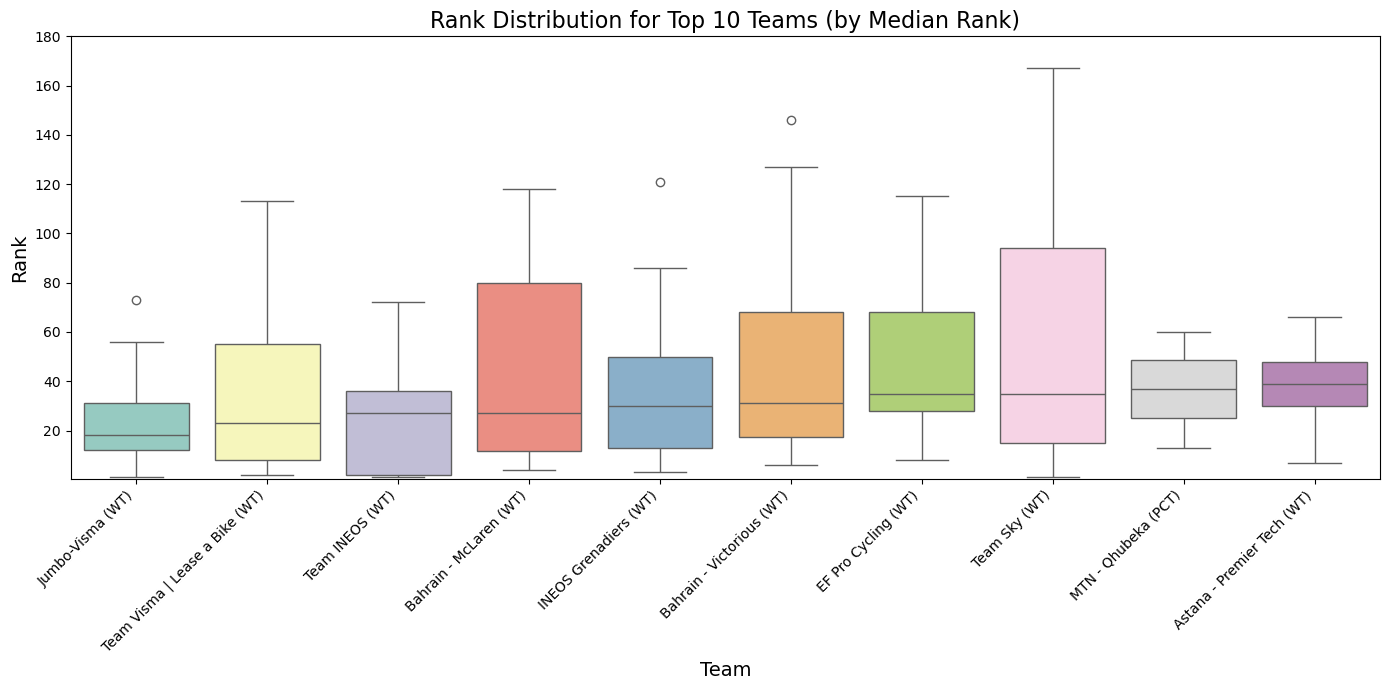

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.boxplot(data=df_top_teams, x='team', y='rank', palette='Set3', order=top_teams)

plt.title(f'Rank Distribution for Top {top_n} Teams (by Median Rank)', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Rank', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0.5, df_encoded['rank'].max() + 5)

plt.tight_layout()
plt.show()


In [116]:
# Encode team by a numeraic summary statistic (e.g., median rank)
team_median_rank = df_encoded.groupby('team')['rank'].median()
df_encoded['team_median_rank'] = df_encoded['team'].map(team_median_rank)


In [119]:
corr_df

,rank
weight,0.479629
bmi,0.415443
height,0.268704
bib_number,0.226577
speciality_sprint,0.177530
age,0.092997
speciality_one_day_races,-0.065673
year_edition,-0.120072
speciality_time_trial,-0.185253
speciality_hills,-0.245748


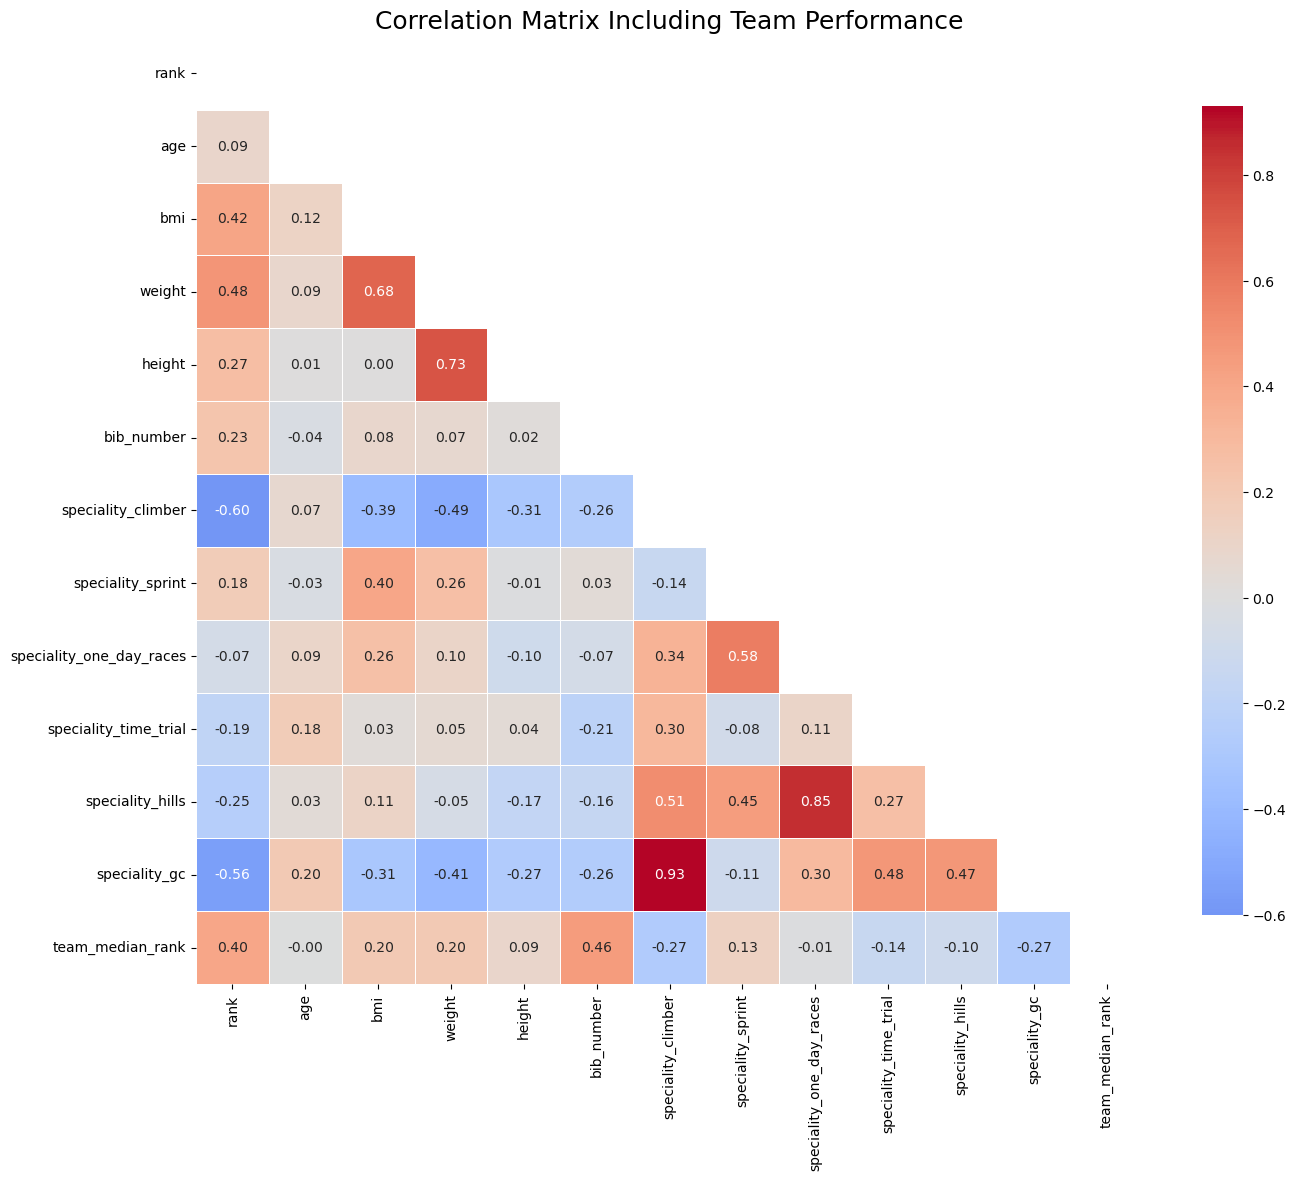

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

features = [
    'rank', 'age', 'bmi', 'weight', 'height', 'bib_number',
    'speciality_climber', 'speciality_sprint', 'speciality_one_day_races',
    'speciality_time_trial', 'speciality_hills', 'speciality_gc', 'team_median_rank'
]

corr = df_encoded[features].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 10}
)

plt.title('Correlation Matrix Including Team Performance', fontsize=18)
plt.tight_layout()
plt.show()


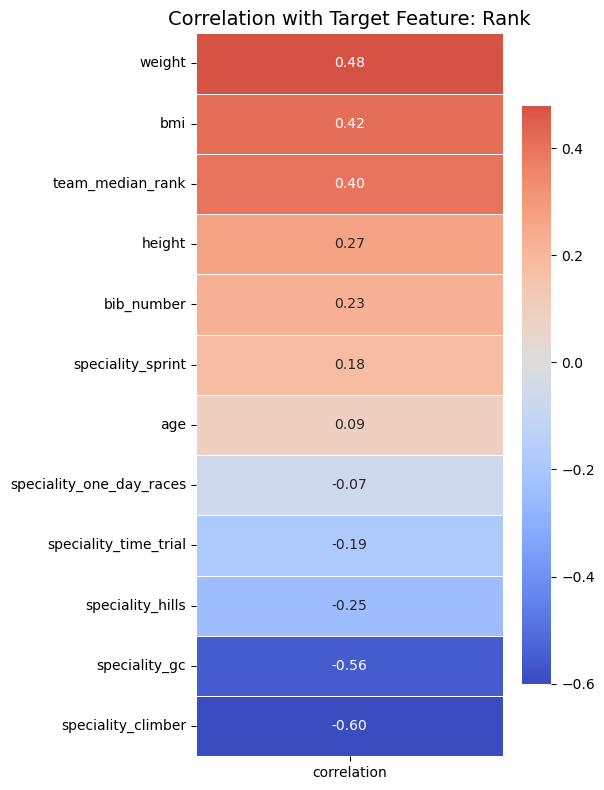

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

features = [
    'age', 'bmi', 'weight', 'height', 'bib_number',
    'speciality_climber', 'speciality_sprint', 'speciality_one_day_races',
    'speciality_time_trial', 'speciality_hills', 'speciality_gc', 'team_median_rank'
]

# Compute correlations with rank
corr = df_encoded[features + ['rank']].corr()
rank_corr = corr['rank'].drop('rank')  # Remove correlation of rank with itself

# Convert to DataFrame and sort
corr_df = rank_corr.to_frame(name='correlation').sort_values(by='correlation', ascending=False)

plt.figure(figsize=(6, len(corr_df) * 0.5 + 2))
sns.heatmap(
    corr_df,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    yticklabels=True
)

plt.title('Correlation with Target Feature: Rank', fontsize=14)
plt.tight_layout()
plt.show()

